In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('astroandes.mplstyle')

In [18]:
def median_bootstrap(x):
    n_points = len(x)
    n_b = 1000
    fit_values = np.ones(n_b)
    for i in range(n_b):
        new_x = np.random.choice(x, size=n_points)
        fit_values[i] = np.median(new_x)
    return np.mean(fit_values), np.std(fit_values)

In [27]:
vel_data = {}
Lbox = {100:106.5, 300:302.6}
for i in [100,300]:
    for res in [1,2,3]:
        vel_data[i+res] = {}
        vel_data[i+res]['data'] = np.loadtxt('../data/lg_pairs_TNG{}-{}.dat'.format(i,res))
        vel_data[i+res]['lbox'] = Lbox[i]
        
for i in range(5):
    filename = '../data/lg_pairs_AbacusSummit_base_c000_ph{:03d}_z0.100.dat'.format(i)
    vel_data[3000+i] = {}
    vel_data[3000+i]['data'] = np.loadtxt(filename)
    vel_data[3000+i]['lbox'] = 2967.0
    
filename = '../data/lg_pairs_AbacusSummit_high_c000_ph100_z0.100.dat'
vel_data[1500] = {}
vel_data[1500]['data'] = np.loadtxt(filename)
vel_data[1500]['lbox'] = 1483.0

filename = '../data/lg_pairs_AbacusSummit_highbase_c000_ph100_z0.100.dat'
vel_data[1501] = {}
vel_data[1501]['data'] = np.loadtxt(filename)
vel_data[1501]['lbox'] = 1483.0

In [28]:
for k in vel_data.keys():
    lbox = vel_data[k]['lbox']
    vtan = vel_data[k]['data'][:,1]
    vrad = vel_data[k]['data'][:,2]
    m,s = median_bootstrap(vtan)
    vel_data[k]['median_vtan'] = m
    vel_data[k]['median_vtan_error'] = s
    print('tan', lbox, m,s)
    m,s = median_bootstrap(vrad)
    print('rad', lbox, m,s)
    vel_data[k]['median_vrad'] = m
    vel_data[k]['median_vrad_error'] = s

tan 106.5 56.56012716200001 17.068588808591542
rad 106.5 -36.24352788000001 10.09419107225666
tan 106.5 43.5339971885 18.772958495771743
rad 106.5 -54.401552432 25.504686829416432
tan 106.5 33.448679382499996 14.802681973701286
rad 106.5 -100.384653862 24.432363499640303
tan 302.6 74.18150702400001 5.8973833246594545
rad 302.6 -43.1785927805 3.3258917625579665
tan 302.6 77.803917415 8.53963497608153
rad 302.6 -55.308535574000004 5.646351150312917
tan 302.6 65.00399265 6.281509736390924
rad 302.6 -38.16819507900001 3.0949937048495704
tan 2967.0 105.09476817699999 0.2009143072539078
rad 2967.0 -108.252038785 0.1988127357190851
tan 2967.0 104.914582415 0.19010271054471253
rad 2967.0 -108.354565375 0.2035715763747491
tan 2967.0 104.9104150525 0.19043614465715508
rad 2967.0 -107.9308019015 0.19748550221225483
tan 2967.0 105.4037788105 0.17891733281325148
rad 2967.0 -108.5816564945 0.19571147255545757
tan 2967.0 104.724647715 0.19891241883770672
rad 2967.0 -108.14761221750001 0.1953645341251

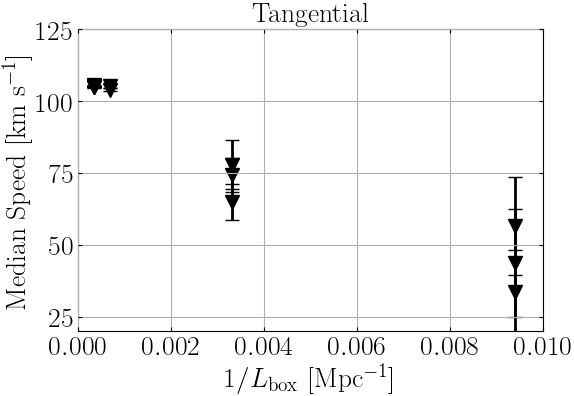

In [55]:
for k in vel_data.keys():
    plt.errorbar(1/vel_data[k]['lbox'], 
                 vel_data[k]['median_vtan'], 
                 yerr=vel_data[k]['median_vtan_error'], fmt='v', capsize=5, ms=10, label='Tangential', color='black')
_ = plt.xlabel("$1/L_{\mathrm{box}}$ [Mpc$^{-1}$]")
_ = plt.ylabel("Median Speed [km s$^{-1}$]")
plt.grid()
plt.xlim([0,1E-2])
plt.ylim([20,125])
plt.title('Tangential')
plt.savefig("median_tangential_speed.pdf")


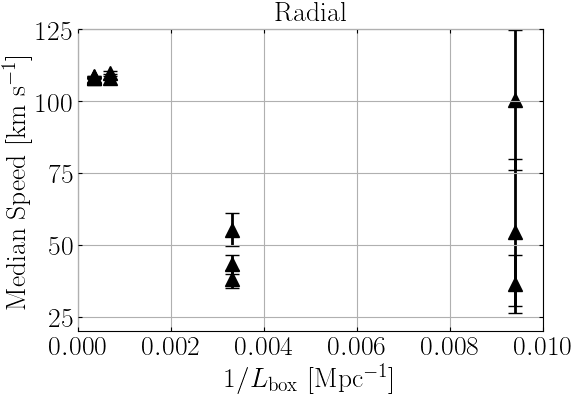

In [56]:
for k in vel_data.keys():
    plt.errorbar(1/vel_data[k]['lbox'], 
                 np.abs(vel_data[k]['median_vrad']), 
                 yerr=vel_data[k]['median_vrad_error'], fmt='^', capsize=5, ms=10, color='black')
_ = plt.xlabel("$1/L_{\mathrm{box}}$ [Mpc$^{-1}$]")
_ = plt.ylabel("Median Speed [km s$^{-1}$]")
plt.grid()
plt.xlim([0,1E-2])
plt.ylim([20,125])
plt.title('Radial')
plt.savefig("median_radial_speed.pdf")


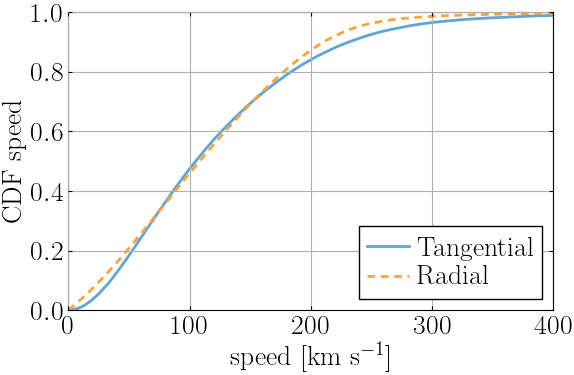

In [66]:
vtan = vel_data[3000]['data'][:,1]
vrad = vel_data[3000]['data'][:,2]
vpec = vel_data[3000]['data'][:,0]

beta = 1.0 - 0.5*(vtan**2/vrad**2)

n = len(vtan)
plt.plot(np.sort(vtan), np.linspace(1.0/n,1,n), linestyle='-', label='Tangential')
plt.plot(np.sort(np.abs(vrad)), np.linspace(1.0/n,1,n), linestyle='--', label='Radial')
#plt.plot(np.sort(np.abs(all_pec_vel)), np.linspace(1.0/n,1,n), linestyle='-.', label='Barycenter')

plt.xlim([0,400])
plt.ylim([0,1])
plt.legend()
plt.xlabel("speed [km s$^{-1}$]")
plt.ylabel("CDF speed")
plt.grid()
plt.tight_layout()
plt.savefig("cdf_speed.pdf")

In [64]:
perc = np.percentile(vtan, q=[16,50,84])
print(perc[1], perc[0]-perc[1], perc[2]-perc[1])

105.102562 -59.14785536000001 94.75782451999996


In [65]:
perc = np.percentile(vrad, q=[16,50,84])
print(perc[1], perc[0]-perc[1], perc[2]-perc[1])

-108.248001 -81.15929404 68.29430552


In [70]:
n_bins = 26
pec_vel_bins = np.arange(0,1050,50)
n_bins = len(pec_vel_bins)
print(pec_vel_bins)
pec_vel_center = 0.5*(pec_vel_bins[1:]+pec_vel_bins[:-1])
mean_tan_vel = np.ones(n_bins-1)
error_tan_vel = np.ones(n_bins-1)
mean_rad_vel = np.ones(n_bins-1)
error_rad_vel = np.ones(n_bins-1)
mean_beta = np.ones(n_bins-1)
error_beta = np.ones(n_bins-1)

mean_mass = np.ones(n_bins-1)
error_mass = np.ones(n_bins-1)

for i in range(n_bins-1):
    min_pec_vel = pec_vel_bins[i]
    max_pec_vel = pec_vel_bins[i+1]
    ii = (vpec > min_pec_vel) & (vpec < max_pec_vel)
    mean_tan_vel[i], error_tan_vel[i] = median_bootstrap(vtan[ii])
    mean_rad_vel[i], error_rad_vel[i] = median_bootstrap(vrad[ii])
    mean_beta[i], error_beta[i] = median_bootstrap(beta[ii])

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000]


[ 4.00054724e-05 -9.10811508e-03  9.86665596e+01]
[-4.17306093e-06  4.20045071e-03 -1.09091218e+02]
[-4.34704109e-07  1.81840051e-04  5.34830482e-01]


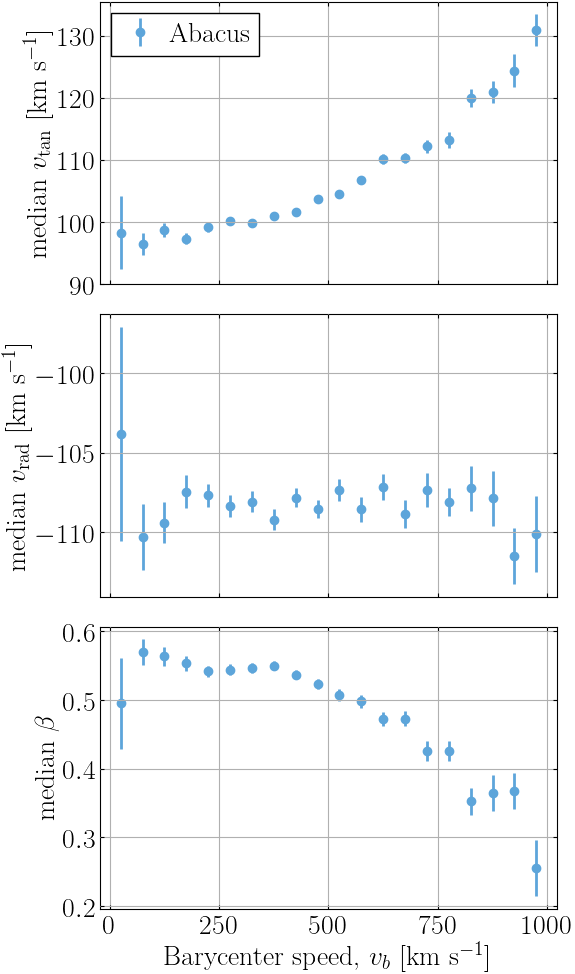

In [71]:
plt.figure(figsize=(6,10))

c = np.polyfit(pec_vel_center, mean_tan_vel, 2, w=1/error_tan_vel)
print(c)
fit_mean_tan_vel = pec_vel_center.copy()*0
for i in range(3):
    fit_mean_tan_vel += c[i] * pec_vel_center**(2-i)

ax1 = plt.subplot(3,1,1)
plt.errorbar(pec_vel_center, mean_tan_vel, error_tan_vel, fmt='o', label='Abacus')
#plt.errorbar(pec_vel_center, fit_mean_tan_vel, label='Best fit')
_=plt.yticks(np.arange(5)*10+ 90)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r"median $v_{\mathrm{tan}}$ [km s$^{-1}$]")
plt.grid()
plt.legend()

c = np.polyfit(pec_vel_center, mean_rad_vel, 2, w=1/error_rad_vel)
print(c)
fit_mean_rad_vel = pec_vel_center.copy()*0

for i in range(3):
    fit_mean_rad_vel += c[i] * pec_vel_center**(2-i)


ax2 = plt.subplot(3,1,2, sharex=ax1)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)


plt.errorbar(pec_vel_center, mean_rad_vel, error_rad_vel, fmt='o')
#plt.errorbar(pec_vel_center, fit_mean_rad_vel)
plt.ylabel(r"median $v_{\mathrm{rad}}$ [km s$^{-1}$]")
#plt.xlabel(r"Barycenter speed $v_{b}$ [km s$^{-1}$]")
plt.grid()



c = np.polyfit(pec_vel_center, mean_beta, 2, w=1/error_beta)
print(c)
fit_beta = pec_vel_center.copy()*0
for i in range(3):
    fit_beta += c[i] * pec_vel_center**(2-i)

ax3 = plt.subplot(3,1,3, sharex=ax1)
# make these tick labels invisible
#plt.setp(ax2.get_xticklabels(), visible=False)


plt.errorbar(pec_vel_center, mean_beta, error_beta, fmt='o')
#plt.errorbar(pec_vel_center, fit_beta)
plt.ylabel(r"median $\beta$")
plt.xlabel(r"Barycenter speed, $v_{b}$ [km s$^{-1}$]")
plt.grid()
plt.tight_layout()
plt.savefig("rad_tan.pdf")